# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# written analysis at the end of code

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Initialize lists
cities_good = []
country = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
wind = []
datetime = []

# Loop through the list of cities and perform a request for data on each 
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(cities.index(city), city)       
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        datetime.append(response['dt'])
        cities_good.append(city)
    
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")    




0 albany
1 yar-sale
2 ushuaia
3 gardabani
4 esperance
5 olavarria
6 bambous virieux
7 kahului
8 mecca
9 sao miguel do araguaia
10 littleton
11 mutsamudu
Missing field/result... skipping.
12 blonduos
Missing field/result... skipping.
13 aklavik
14 tabiauea
Missing field/result... skipping.
15 cidreira
16 castro
17 mingaora
18 rikitea
19 port alfred
20 hasaki
21 avarua
22 busselton
23 rosetta
24 saint george
25 carnarvon
26 saskylakh
27 manavalakurichi
28 ilulissat
29 maloy
30 monte patria
31 aksu
32 taolanaro
Missing field/result... skipping.
33 jamestown
34 uttiramerur
35 mys shmidta
Missing field/result... skipping.
36 lebu
37 morant bay
38 yellowknife
39 tuktoyaktuk
40 upernavik
41 ulladulla
42 laguna de perlas
43 vila do maio
44 uyskoye
45 svobodnyy
46 ankang
47 medicine hat
48 mataura
49 grand river south east
Missing field/result... skipping.
50 coahuayana
51 hermanus
52 fortuna
53 batagay-alyta
54 palabuhanratu
Missing field/result... skipping.
55 amderma
Missing field/result... 

510 along
511 vangaindrano
512 mosquera
513 grindavik
514 oum hadjer
515 maniitsoq
516 krutinka
517 ambulu
518 boyabat
519 marzuq
520 plettenberg bay
521 krasnoselkup
522 neijiang
523 collie
524 katherine
525 tuatapere
526 salamiyah
527 sayat
528 itoman
529 dzhebariki-khaya
530 longlac
Missing field/result... skipping.
531 los llanos de aridane
532 yumen
533 nantucket
534 vostok
535 redcliffe
536 sinnamary
537 uige
538 ayan
539 sola
540 batemans bay
541 dillon
542 aksarka
543 anchorage
544 chiredzi
545 qaqortoq
546 sioux falls
547 khammam
548 serebryansk
549 mackay
550 naze
551 humboldt
552 komyshnya
Missing field/result... skipping.
553 sulina
554 pervomayskoye
555 usinsk
556 vaitupu
Missing field/result... skipping.
557 kamenka
558 tilichiki
559 bac lieu
560 adrar
561 kalabo
562 gorno-chuyskiy
Missing field/result... skipping.
563 gainesville
564 berezovyy
565 vohibinany
566 novosergiyevka
567 kananga
568 bastrop
569 ancud
570 lorengau
571 harper
572 porto recanati
573 gorontalo
574 

In [27]:
print(len(cities))
print(len(cities_good))
print(len(lat))
print(len(lon))
print(len(temp))
print(len(humidity))
print(len(wind))
print(len(cloudiness))
print(len(country))

615
564
564
564
564
564
564
564
564


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cities_good,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature": temp,
    "Humidity": humidity,
    "Wind": wind,
    "Cloudiness": cloudiness,
    "Datetime": datetime
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind,Cloudiness,Datetime
0,albany,US,42.60,-73.97,39.79,33,24.16,40,1587069002
1,yar-sale,RU,66.83,70.83,16.97,98,10.83,97,1587069015
2,ushuaia,AR,-54.80,-68.30,57.20,58,4.70,99,1587069008
3,gardabani,GE,41.46,45.09,46.40,70,34.45,82,1587069121
4,esperance,AU,-33.87,121.90,51.80,87,6.93,0,1587069048
...,...,...,...,...,...,...,...,...,...
559,murmashi,RU,68.82,32.81,33.80,86,8.95,75,1587069226
560,rognan,NO,67.10,15.39,35.82,69,24.16,40,1587069226
561,doctor arroyo,MX,23.67,-100.18,77.67,20,10.33,91,1587069226
562,hella,NO,67.20,14.43,35.94,69,24.16,40,1587069227


In [6]:
#Export to csv
weather_data.to_csv(output_data_file, index=False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#skipping becasue no city had humidity over 100

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:

def make_scatter (y, unit):
    plt.scatter(weather_data["Latitude"], weather_data[y])
    plt.title(y + ' vs ' + 'Latitude')
    plt.xlabel('Latitude')
    plt.ylabel(y + unit)

    plt.savefig('output_data/' + y + ' vs ' + 'Latitude' + '.png')
    plt.show()

## Latitude vs. Temperature Plot

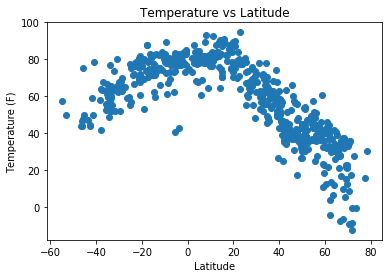

In [12]:
make_scatter("Temperature", " (F)")
    

## Latitude vs. Humidity Plot

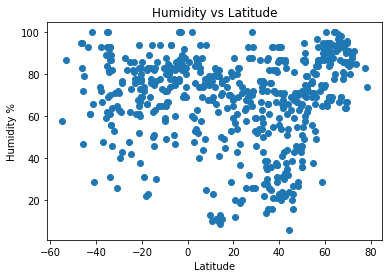

In [13]:
make_scatter("Humidity", " %")

## Latitude vs. Cloudiness Plot

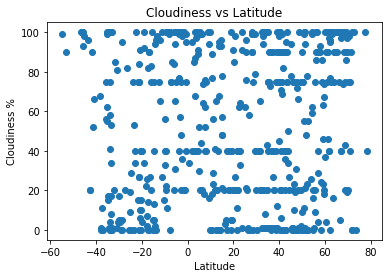

In [14]:
make_scatter("Cloudiness", " %")

## Latitude vs. Wind Speed Plot

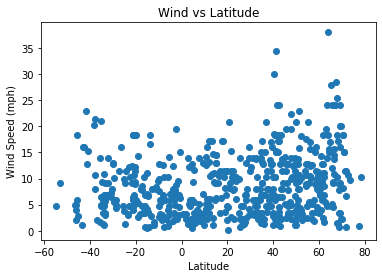

In [15]:
make_scatter("Wind", " Speed (mph)")

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

def make_scatter_with_line (dataframe, y, unit, xlocation, ylocation, northern_or_southern):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(dataframe["Latitude"], dataframe[y])
    r = round(rvalue, 2)
    slope_s = str(round(slope, 2))
    intercept_s = str(round(intercept, 2))
    line_eq = "y = " + slope_s + "x" + " + " + intercept_s
    plt.annotate(line_eq,(xlocation,ylocation),fontsize=15,color="red")
    plt.annotate("r = "+ str(r),(xlocation,(ylocation + 8)),fontsize=15,color="red")
    plt.plot(dataframe["Latitude"], slope*dataframe["Latitude"]+ intercept, color="r")
   
    plt.scatter(dataframe["Latitude"], dataframe[y])
    plt.title(northern_or_southern + ' Hemisphere - ' + y + ' vs ' + 'Latitude' )
    plt.xlabel('Latitude')
    plt.ylabel(y + unit)
    
    plt.savefig('output_data/' + northern_or_southern + ' Hemisphere - ' + y + ' vs ' + 'Latitude' + '.png')
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames

weather_data_north = weather_data.loc[weather_data['Latitude'] >= 0]
weather_data_south = weather_data.loc[weather_data['Latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

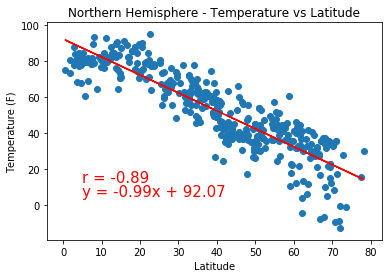

In [18]:
make_scatter_with_line(weather_data_north, "Temperature", " (F)", 5, 5, "Northern")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

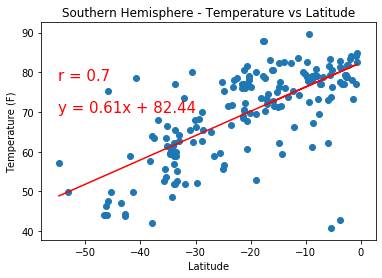

In [19]:
make_scatter_with_line(weather_data_south, "Temperature", " (F)", -55, 70, "Southern")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

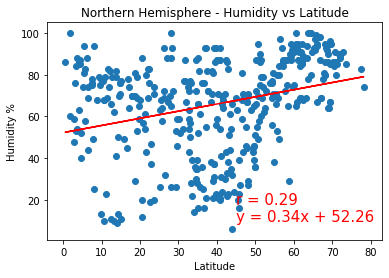

In [31]:
make_scatter_with_line(weather_data_north, "Humidity", " %", 45, 10, "Northern")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

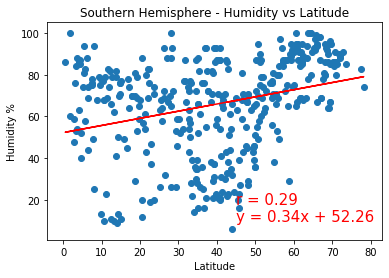

In [30]:
make_scatter_with_line(weather_data_north, "Humidity", " %", 45, 10, "Southern")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

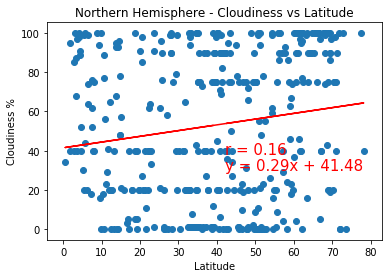

In [22]:
make_scatter_with_line(weather_data_north, "Cloudiness", " %", 42, 30, "Northern")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

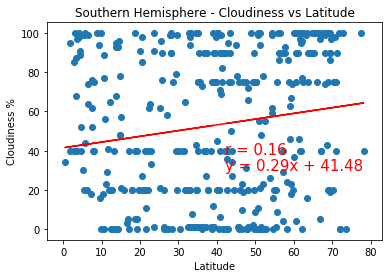

In [23]:
make_scatter_with_line(weather_data_north, "Cloudiness", " %", 42, 30, "Southern")

In [33]:
#function for annotations closer together
def make_scatter_with_line_2 (dataframe, y, unit, xlocation, ylocation, northern_or_southern):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(dataframe["Latitude"], dataframe[y])
    r = round(rvalue, 2)
    slope_s = str(round(slope, 2))
    intercept_s = str(round(intercept, 2))
    line_eq = "y = " + slope_s + "x" + " + " + intercept_s
    plt.annotate(line_eq,(xlocation,ylocation),fontsize=15,color="red")
    plt.annotate("r = "+ str(r),(xlocation,(ylocation + 4)),fontsize=15,color="red")
    plt.plot(dataframe["Latitude"], slope*dataframe["Latitude"]+ intercept, color="r")
   
    plt.scatter(dataframe["Latitude"], dataframe[y])
    plt.title(northern_or_southern + ' Hemisphere - ' + y + ' vs ' + 'Latitude' )
    plt.xlabel('Latitude')
    plt.ylabel(y + unit)
    
    plt.savefig('output_data/' + northern_or_southern + ' Hemisphere - ' + y + ' vs ' + 'Latitude' + '.png')
    plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

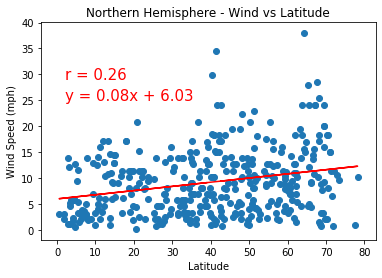

In [34]:
make_scatter_with_line_2(weather_data_north, "Wind", " Speed (mph)", 2, 25, "Northern")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

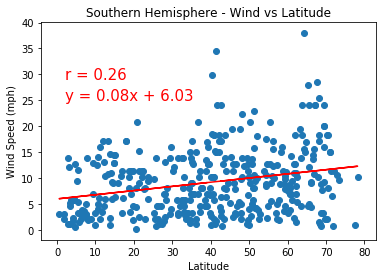

In [35]:
make_scatter_with_line_2(weather_data_north, "Wind", " Speed (mph)", 2, 25, "Southern")

## Trends

There is a strong correlation between temperature and latitude, but humidity, cloudiness, and wind speed did not have strong correlations with latitude. Splitting up the data by hemisphere, resulted in linear regressions with correlation coefficients of 0.7 and 0.89, for Southern and Northern respectively. This means a line is a good fit for the data. The correlation was negative for the Northern Hemisphere and positive for the Southern Hemisphere. This result is consistent with the general knowledge that locations near the equator, smaller absolute degrees latitude, tend to be warmer. To strengthen this analysis, much more data would have to be analyzed over long time periods and over truly random coordinates, not just ones were cities are. The linear regressions run for humidity, cloudiness, and wind speed resulted in regressions with correlation coefficient well below 0.5 signifying a line is not a good fit for the data. These weather phenomena are more dependent on current atmospheric conditions, land or water formations, and many other factors that cannot be simply tied to latitude.